# Teste de Kolmogorov-Smirnov

O Teste de Kolmogorov-Smirnov (KS) é um método estatístico utilizado para determinar se uma amostra segue uma distribuição de probabilidade específica. Ele compara a função de distribuição empírica (EDF) dos dados observados com a função de distribuição acumulada (CDF) da distribuição teórica. Este teste é útil para avaliar a adequação de um modelo teórico aos dados observados.


O teste KS calcula a estatística D de Kolmogorov-Smirnov, que é a maior diferença absoluta entre as funções de distribuição empírica e teórica. Comparamos essa estatística com um valor crítico para determinar se os dados observados seguem a distribuição teórica.

## Resultados Esperados
<br>

<div style="border:2px solid black; padding: 10px; background-color:#CEE0DC">
    <ul>
        <li>Se a estatística D for menor que o valor crítico, podemos aceitar a hipótese nula de que os dados seguem a distribuição teórica.</li>
        <li>Se a estatística D for maior que o valor crítico, há evidências de que os dados observados não seguem a distribuição teórica.</li>
    </ul>  </div>


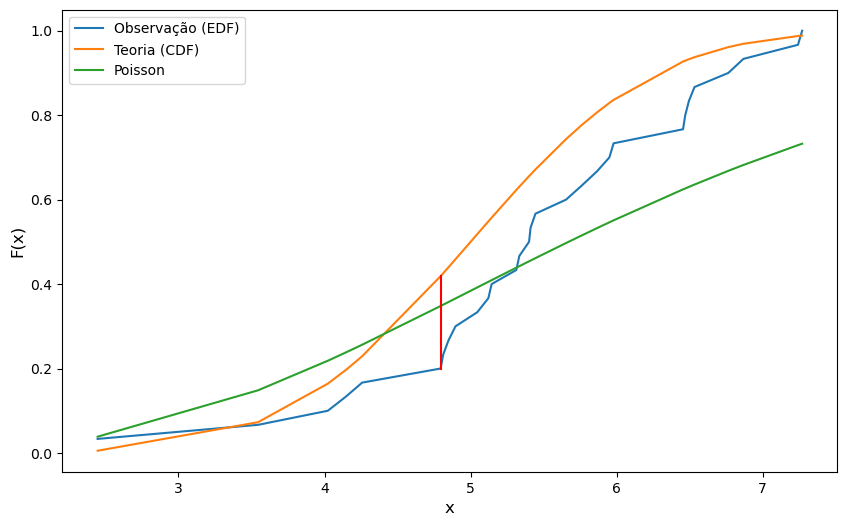

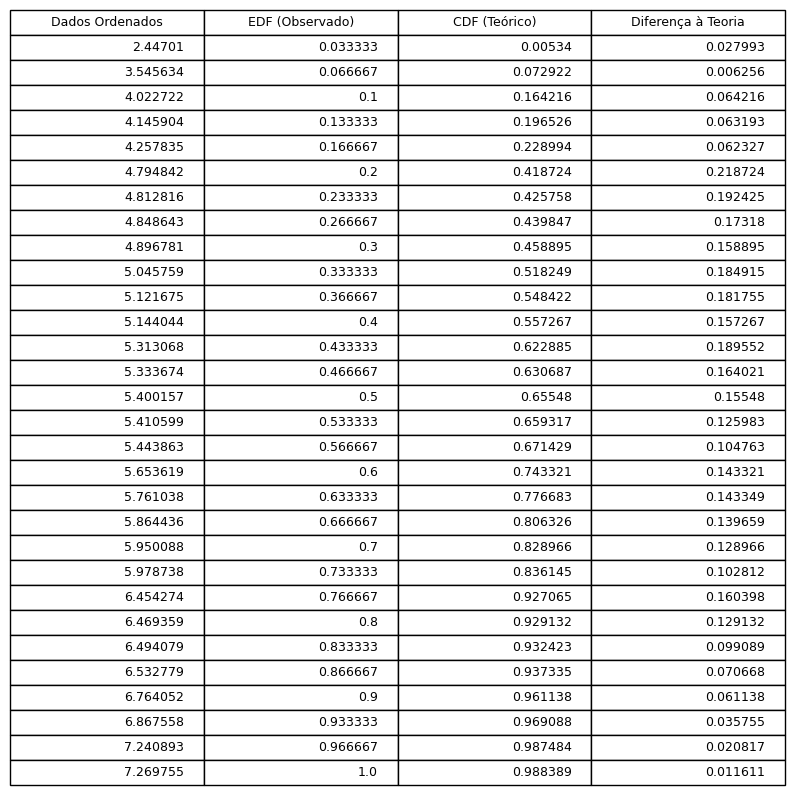

-------------------------------------------------------------------------------------
Os dados observados seguem uma distribuição normal.
-------------------------------------------------------------------------------------
Diferença em relação à distribuição normal
[0.0279932  0.00625581 0.0642158  0.06319264 0.06232701 0.21872424
 0.19242491 0.17318031 0.15889464 0.18491531 0.18175513 0.15726697
 0.18955205 0.16402067 0.15547963 0.12598319 0.1047626  0.14332122
 0.1433494  0.13965918 0.12896634 0.10281194 0.16039809 0.12913225
 0.09908919 0.0706682  0.06113842 0.03575481 0.02081684 0.01161124]
-------------------------------------------------------------------------------------
Diferença máxima em relação à distribuição normal:0.219
Valor crítico no intervalo de confiança de 95%:0.248


In [110]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from numpy.random import seed
import math

def normal_cdf(x, mu, sigma):
    return 0.5 * (1 + math.erf((x - mu) / (sigma * math.sqrt(2))))

def kolmogorov_smirnov_test(sample_size):
    # Definir média e desvio padrão
    mu = 5
    sigma = 1
    # Definir uma semente por exemplo, tornar este exemplo reproduzível
    seed(0)

    # Gerar array aleatório
    arr_1_few = np.random.normal(mu, sigma, size=sample_size)
    # Ordenar array gerado
    arr_1_sorted = np.sort(arr_1_few)
    # EDF (Função de Distribuição Empírica)
    arr_1_edf_few = np.arange(1, len(arr_1_few) + 1) / len(arr_1_few)
    # Gerar conjunto de dados que segue uma distribuição de Poisson com média=mu
    poisson_cdf = 1 - st.poisson.cdf(mu, arr_1_sorted)

    # Plotar gráfico
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plotar EDF e CDF normal
    ax.plot(arr_1_sorted, arr_1_edf_few, label="Observação (EDF)")
    y_cdf = [normal_cdf(x, mu, sigma) for x in arr_1_sorted]  # CDF normal personalizada
    ax.plot(arr_1_sorted, y_cdf, label="Teoria (CDF)")
    ax.plot(arr_1_sorted, poisson_cdf, label="Poisson")
    ax.set_xlabel("x", size=12)
    ax.set_ylabel("F(x)", size=12)

    # Calcular diferença absoluta
    arr_dif_abs = np.abs(y_cdf - arr_1_edf_few)
    # Obter índice da diferença máxima
    max_diff_index = np.argmax(arr_dif_abs)
    # Obter valor da diferença máxima
    max_diff_value = arr_dif_abs[max_diff_index]
    # Plotar linha para a diferença máxima
    ax.plot([arr_1_sorted[max_diff_index], arr_1_sorted[max_diff_index]],
            [arr_1_edf_few[max_diff_index], y_cdf[max_diff_index]],
            color='red', linestyle='-')

    legend = ax.legend(loc="upper left")
    plt.show()

    # Exibir tabela com as frequências acumuladas e diferenças
    dif_teorica = np.abs(y_cdf - arr_1_edf_few)
    table_data = np.column_stack((arr_1_sorted, arr_1_edf_few, y_cdf, dif_teorica))
    col_labels = ['Dados Ordenados', 'EDF (Observado)', 'CDF (Teórico)', 'Diferença à Teoria']
    fig, ax = plt.subplots(figsize=(10, 3))
    table = ax.table(cellText=np.around(table_data, decimals=6), colLabels=col_labels, loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 1.5)
    ax.axis('off')
    plt.show()

    # Teste de Kolmogorov-Smirnov (KS)
    # Comparar distribuição observada com distribuição normal
    dn_ks = max(arr_dif_abs)

    # Calcular valor crítico no intervalo de confiança de 95%
    D_critical = st.kstwobign.ppf(1 - 0.05) / np.sqrt(sample_size)

    print("-" * 85)
    if dn_ks < D_critical:
        print("Os dados observados seguem uma distribuição normal.")
    else:
        print("Há evidências de que os dados observados não seguem uma distribuição normal.")

    print("-" * 85)

    print("Diferença em relação à distribuição normal")
    print(arr_dif_abs)
    print("-" * 85)
    # Obter diferença máxima
    print("Diferença máxima em relação à distribuição normal:{:.3f}".format(dn_ks))
    print("Valor crítico no intervalo de confiança de 95%:{:.3f}".format(D_critical))

kolmogorov_smirnov_test(30)


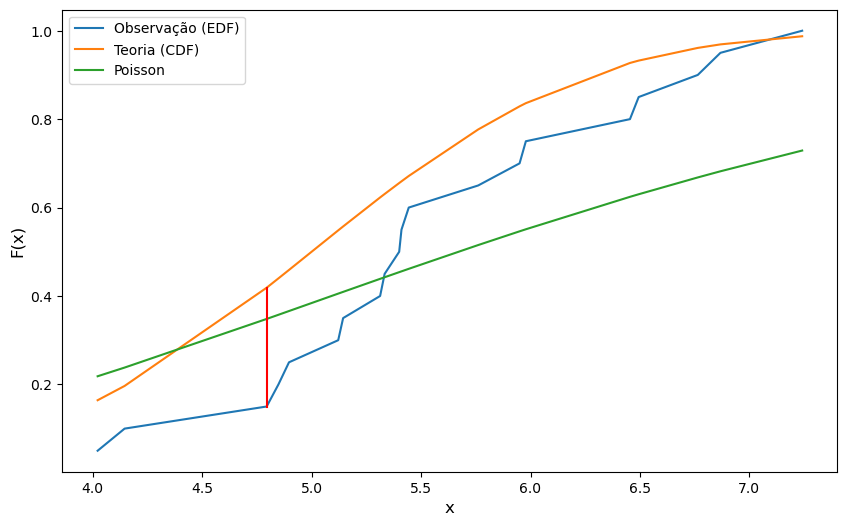

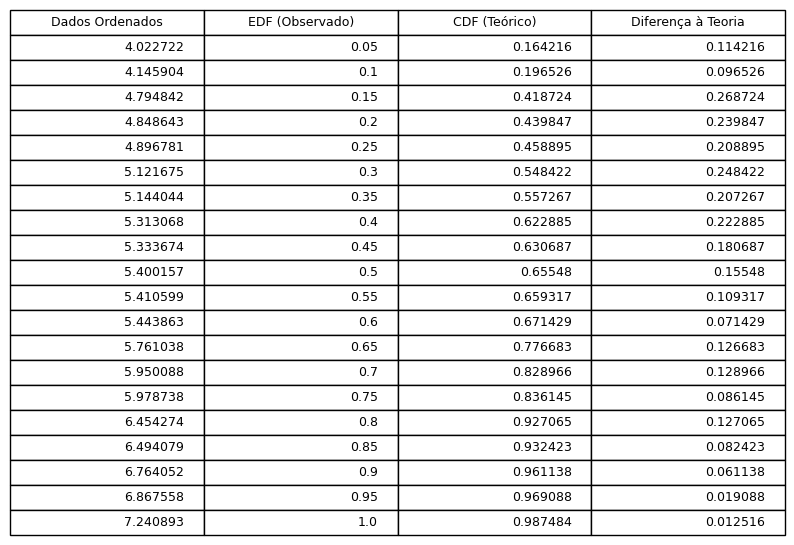

-------------------------------------------------------------------------------------
Os dados observados seguem uma distribuição normal.
-------------------------------------------------------------------------------------
Diferença em relação à distribuição normal
[0.1142158  0.09652597 0.26872424 0.23984697 0.20889464 0.2484218
 0.20726697 0.22288539 0.18068734 0.15547963 0.10931652 0.07142927
 0.12668273 0.12896634 0.08614527 0.12706475 0.08242252 0.06113842
 0.01908815 0.0125165 ]
-------------------------------------------------------------------------------------
Diferença máxima em relação à distribuição normal:0.269
Valor crítico no intervalo de confiança de 95%:0.304


In [98]:
kolmogorov_smirnov_test(20)

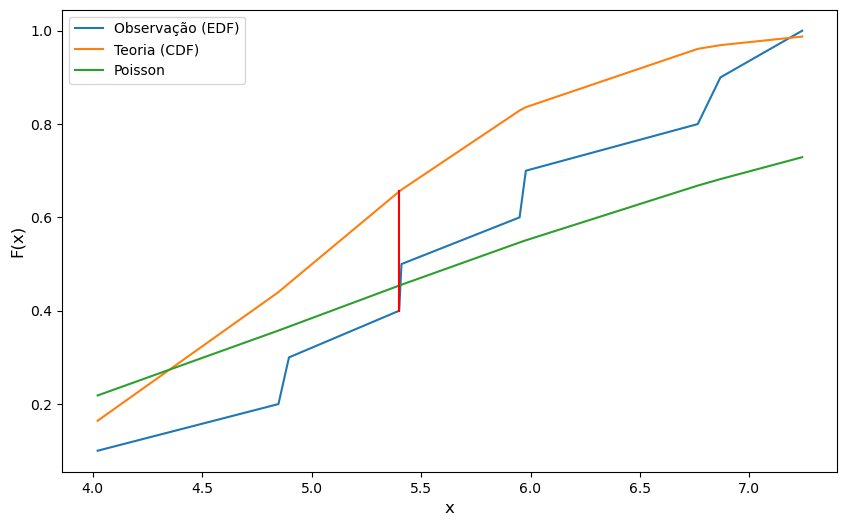

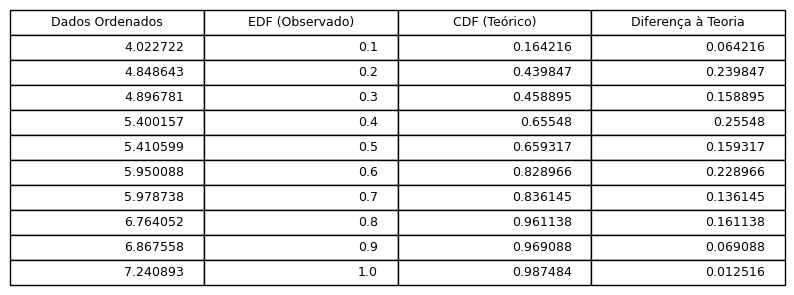

-------------------------------------------------------------------------------------
Os dados observados seguem uma distribuição normal.
-------------------------------------------------------------------------------------
Diferença em relação à distribuição normal
[0.0642158  0.23984697 0.15889464 0.25547963 0.15931652 0.22896634
 0.13614527 0.16113842 0.06908815 0.0125165 ]
-------------------------------------------------------------------------------------
Diferença máxima em relação à distribuição normal:0.255
Valor crítico no intervalo de confiança de 95%:0.429


In [97]:
kolmogorov_smirnov_test(10)

# Teste Kolmogorov-Smirnov com Distribuição Não Normal

## Distribuição Uniforme

A distribuição uniforme é um tipo de distribuição de probabilidade em que todos os valores possíveis de uma variável aleatória têm a mesma probabilidade de ocorrência. Em outras palavras, em uma distribuição uniforme, todos os valores dentro de um intervalo específico são igualmente prováveis de ocorrer.

## Por que o teste não identifica a distribuição uniforme como normal?
- O teste de Kolmogorov-Smirnov (KS) é usado para testar a igualdade de distribuições empíricas ou teóricas. Ele compara uma distribuição de dados observados com uma distribuição de referência, como a distribuição normal. 
- Como a distribuição uniforme não possui a mesma forma característica de uma distribuição normal, o teste KS não a identificará como normal. A distribuição uniforme tem uma densidade de probabilidade constante dentro de um intervalo, enquanto a distribuição normal tem uma forma de sino com valores mais concentrados em torno da média.
- Portanto, o teste KS é capaz de detectar as diferenças na forma da distribuição e, assim, distinguir entre uma distribuição uniforme e uma distribuição normal.

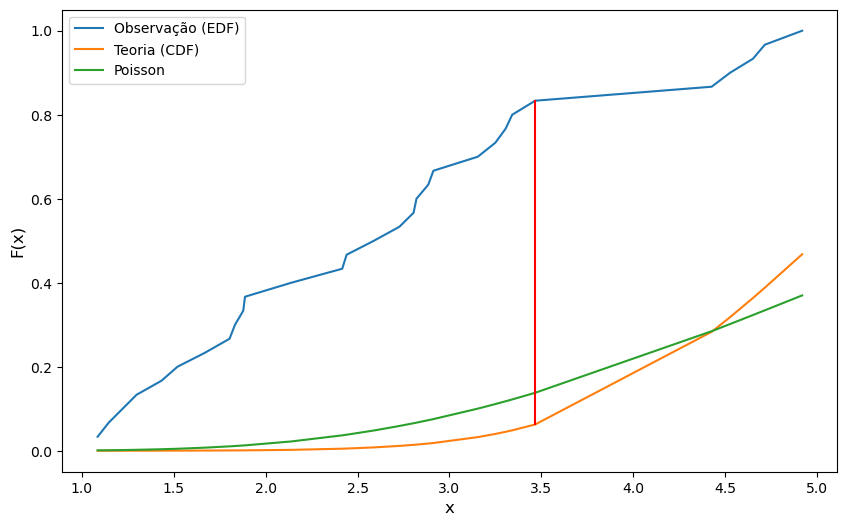

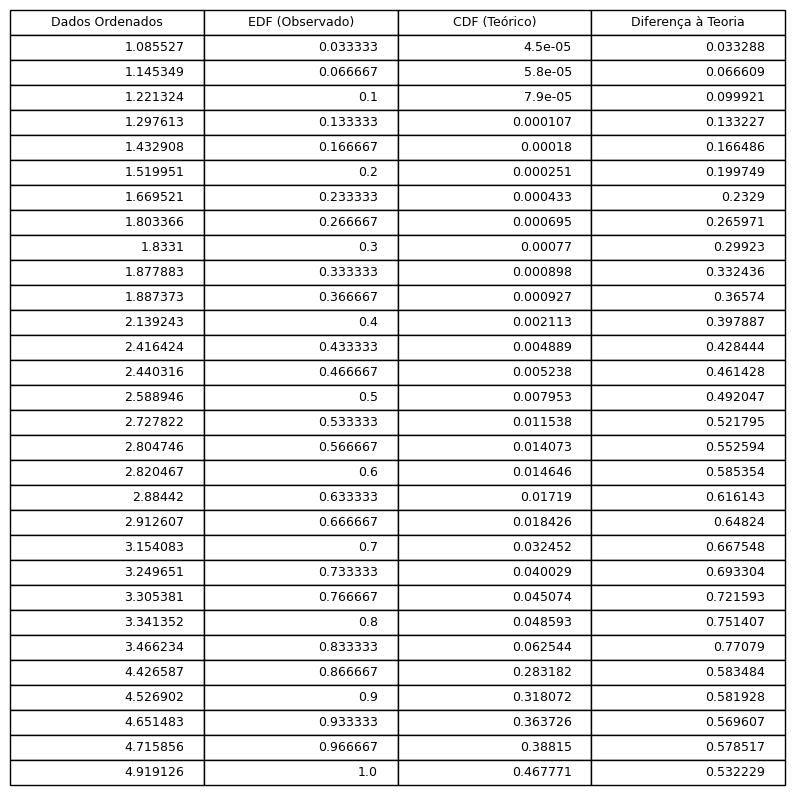

-------------------------------------------------------------------------------------
Há evidências de que os dados observados não seguem uma distribuição normal.
-------------------------------------------------------------------------------------
Diferença em relação à distribuição normal
[0.03328803 0.06660872 0.09992117 0.13322654 0.16648618 0.19974934
 0.23289985 0.26597146 0.29922963 0.33243555 0.36573952 0.39788685
 0.42844424 0.4614283  0.49204674 0.52179546 0.55259398 0.58535394
 0.61614305 0.64824037 0.6675479  0.69330426 0.72159283 0.7514066
 0.77078973 0.58348417 0.58192826 0.56960743 0.57851674 0.53222876]
-------------------------------------------------------------------------------------
Diferença máxima em relação à distribuição normal:0.771
Valor crítico no intervalo de confiança de 95%:0.248


In [117]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from numpy.random import seed
import math

def normal_cdf(x, mu, sigma):
    return 0.5 * (1 + math.erf((x - mu) / (sigma * math.sqrt(2))))

def kolmogorov_smirnov_test(sample_size):
    # Definir média e desvio padrão
    mu = 5
    sigma = 1
    # Definir uma semente por exemplo, tornar este exemplo reproduzível
    seed(0)

    # Gerar array aleatório
    arr_1_few = np.random.uniform(mu, sigma, size=sample_size)
    # Ordenar array gerado
    arr_1_sorted = np.sort(arr_1_few)
    # EDF (Função de Distribuição Empírica)
    arr_1_edf_few = np.arange(1, len(arr_1_few) + 1) / len(arr_1_few)
    # Gerar conjunto de dados que segue uma distribuição de Poisson com média=mu
    poisson_cdf = 1 - st.poisson.cdf(mu, arr_1_sorted)

    # Plotar gráfico
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plotar EDF e CDF normal
    ax.plot(arr_1_sorted, arr_1_edf_few, label="Observação (EDF)")
    y_cdf = [normal_cdf(x, mu, sigma) for x in arr_1_sorted]  # CDF normal personalizada
    ax.plot(arr_1_sorted, y_cdf, label="Teoria (CDF)")
    ax.plot(arr_1_sorted, poisson_cdf, label="Poisson")
    ax.set_xlabel("x", size=12)
    ax.set_ylabel("F(x)", size=12)

    # Calcular diferença absoluta
    arr_dif_abs = np.abs(y_cdf - arr_1_edf_few)
    # Obter índice da diferença máxima
    max_diff_index = np.argmax(arr_dif_abs)
    # Obter valor da diferença máxima
    max_diff_value = arr_dif_abs[max_diff_index]
    # Plotar linha para a diferença máxima
    ax.plot([arr_1_sorted[max_diff_index], arr_1_sorted[max_diff_index]],
            [arr_1_edf_few[max_diff_index], y_cdf[max_diff_index]],
            color='red', linestyle='-')

    legend = ax.legend(loc="upper left")
    plt.show()

    # Exibir tabela com as frequências acumuladas e diferenças
    dif_teorica = np.abs(y_cdf - arr_1_edf_few)
    table_data = np.column_stack((arr_1_sorted, arr_1_edf_few, y_cdf, dif_teorica))
    col_labels = ['Dados Ordenados', 'EDF (Observado)', 'CDF (Teórico)', 'Diferença à Teoria']
    fig, ax = plt.subplots(figsize=(10, 3))
    table = ax.table(cellText=np.around(table_data, decimals=6), colLabels=col_labels, loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 1.5)
    ax.axis('off')
    plt.show()

    # Teste de Kolmogorov-Smirnov (KS)
    # Comparar distribuição observada com distribuição normal
    dn_ks = max(arr_dif_abs)

    # Calcular valor crítico no intervalo de confiança de 95%
    D_critical = st.kstwobign.ppf(1 - 0.05) / np.sqrt(sample_size)

    print("-" * 85)
    if dn_ks < D_critical:
        print("Os dados observados seguem uma distribuição normal.")
    else:
        print("Há evidências de que os dados observados não seguem uma distribuição normal.")

    print("-" * 85)

    print("Diferença em relação à distribuição normal")
    print(arr_dif_abs)
    print("-" * 85)
    # Obter diferença máxima
    print("Diferença máxima em relação à distribuição normal:{:.3f}".format(dn_ks))
    print("Valor crítico no intervalo de confiança de 95%:{:.3f}".format(D_critical))

kolmogorov_smirnov_test(30)


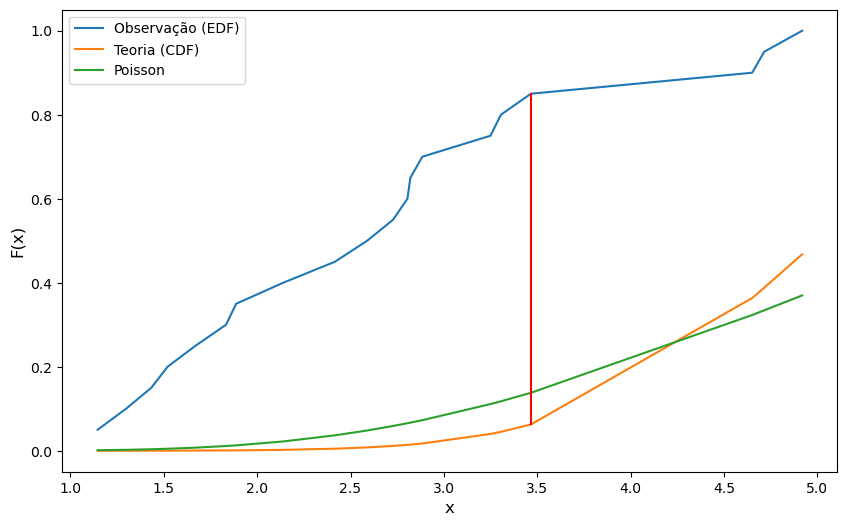

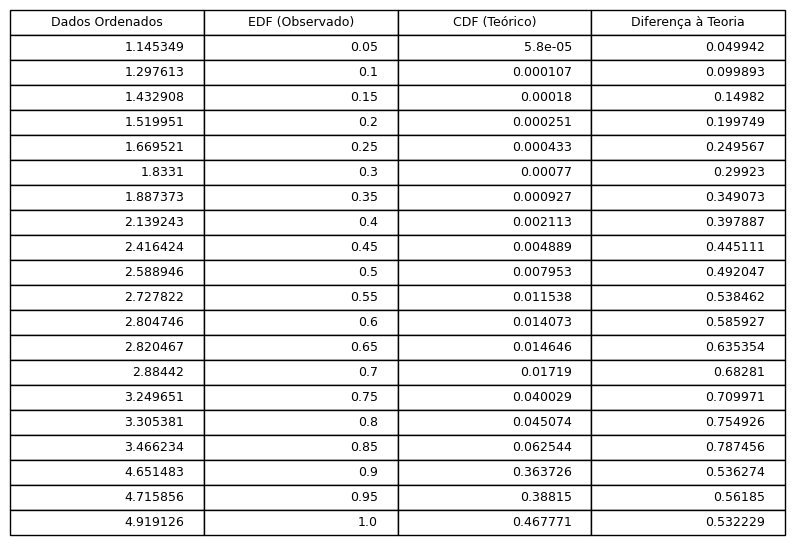

-------------------------------------------------------------------------------------
Há evidências de que os dados observados não seguem uma distribuição normal.
-------------------------------------------------------------------------------------
Diferença em relação à distribuição normal
[0.04994205 0.09989321 0.14981952 0.19974934 0.24956652 0.29922963
 0.34907285 0.39788685 0.44511091 0.49204674 0.53846213 0.58592731
 0.63535394 0.68280971 0.70997093 0.75492616 0.78745639 0.5362741
 0.56185007 0.53222876]
-------------------------------------------------------------------------------------
Diferença máxima em relação à distribuição normal:0.787
Valor crítico no intervalo de confiança de 95%:0.304


In [118]:
kolmogorov_smirnov_test(20)

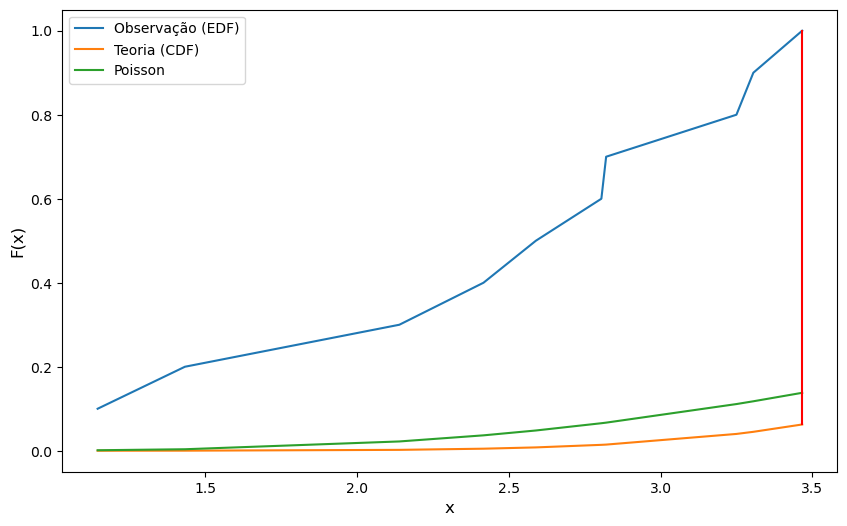

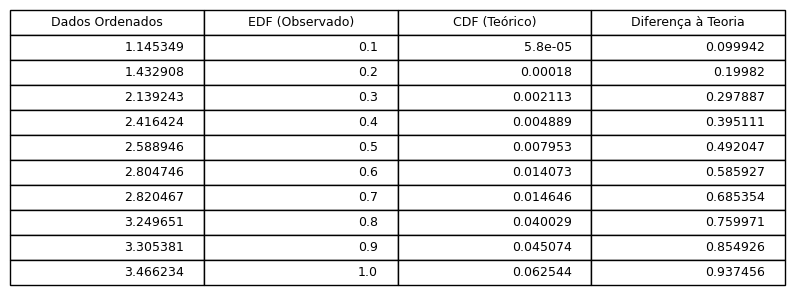

-------------------------------------------------------------------------------------
Há evidências de que os dados observados não seguem uma distribuição normal.
-------------------------------------------------------------------------------------
Diferença em relação à distribuição normal
[0.09994205 0.19981952 0.29788685 0.39511091 0.49204674 0.58592731
 0.68535394 0.75997093 0.85492616 0.93745639]
-------------------------------------------------------------------------------------
Diferença máxima em relação à distribuição normal:0.937
Valor crítico no intervalo de confiança de 95%:0.429


In [119]:
kolmogorov_smirnov_test(10)

## Relatório de Teste de Kolmogorov-Smirnov (KS)

---

O teste de Kolmogorov-Smirnov (KS) é uma técnica estatística utilizada para testar se uma amostra de dados segue uma distribuição específica. Neste relatório, foi realizado um teste KS para verificar se uma amostra de dados segue uma distribuição normal.

**1. Implementação do Teste KS:**

O teste KS foi implementado utilizando a linguagem de programação Python. O código gerou uma amostra de dados aleatórios com uma distribuição normal, calculou a função de distribuição empírica (EDF) e comparou com a função de distribuição cumulativa (CDF) teórica da distribuição normal. 

**2. Resultados:**

Os resultados do teste KS são os seguintes:

- **Diferença Máxima (Dn):** A maior diferença absoluta entre a EDF observada e a CDF teórica.
- **Valor Crítico:** Valor crítico calculado para o intervalo de confiança de 95%.

**3. Conclusão:**

Com base na diferença máxima (Dn) e no valor crítico, concluímos se os dados observados seguem ou não uma distribuição normal.

**4. Visualização dos Dados:**

Foram plotados dois gráficos:
- O primeiro mostra a comparação entre a EDF observada e a CDF teórica da distribuição normal, juntamente com a distribuição de Poisson com a mesma média.
- O segundo apresenta uma tabela com os dados ordenados, EDF observada, CDF teórica e a diferença entre elas.

---

**Conclusão do Teste KS:**

- Se a diferença máxima (Dn) for menor que o valor crítico, os dados seguem uma distribuição normal.
- Se a diferença máxima (Dn) for maior que o valor crítico, há evidências de que os dados observados não seguem uma distribuição normal.